In [1]:
# Importing the required modules
!pip install catboost

     |████████████████████████████████| 76.3 MB 1.2 MB/s 


In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedShuffleSplit
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.experimental import enable_hist_gradient_boosting
from sklearn.ensemble import RandomForestClassifier, HistGradientBoostingClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score
from imblearn.over_sampling import SMOTE
from xgboost import XGBClassifier
import pickle
import warnings
warnings.filterwarnings('ignore')
plt.rcParams['figure.figsize'] = (10,6)

/usr/local/lib/python3.7/dist-packages/sklearn/experimental/enable_hist_gradient_boosting.py:17: UserWarning: Since version 1.0, it is not needed to import enable_hist_gradient_boosting anymore. HistGradientBoostingClassifier and HistGradientBoostingRegressor are now stable and can be normally imported from sklearn.ensemble.
  "Since version 1.0, "


In [3]:
from google.colab import drive
drive.mount('/content/drive')
df = pd.read_csv('/content/drive/MyDrive/PW22RBA01 Capstone Project/Phase2/AP Data Analysis/With Indices/NDWI/Cleaned_Soil.csv')
# Importing the dataset
# df = pd.read_csv('Cleaned_Soil.csv')

Mounted at /content/drive


In [4]:
# Obtaining data specific to Anantapur

In [5]:
df = df[df['District'] == 'Kurnool']
df.head()

,Unnamed: 0,Latitude,Longitude,District,Mandal,Village,SoilType,pH,EC,OC,P,K,Ca,Mg,S,Zn,B,Fe,Cu,Mn,NDVI,ARVI,EVI,GCI,NDWI,Crop
1700,1702,15.34,78.32,Kurnool,Banaganpalli,Applapuram,Black,8.62,0.98,0.37,4.10,192.0,7280.0,878.0,58.30,0.43,2.71,13.79,1.04,7.36,0.228808,0.143780,0.219145,0.661369,-0.248507,Chickpea
1701,1703,15.34,78.32,Kurnool,Banaganpalli,Applapuram,Black,8.22,0.31,0.32,5.46,212.0,9156.0,1006.0,4.54,0.40,0.93,13.81,1.29,19.02,0.228808,0.143780,0.219145,0.661369,-0.248507,Chickpea
1702,1704,15.33,78.32,Kurnool,Banaganpalli,Applapuram,Black,8.27,0.41,0.42,9.21,299.0,8995.0,1454.0,13.67,0.40,1.14,13.79,1.27,25.99,0.302195,0.175457,0.345572,0.996307,-0.332512,Chickpea
1703,1705,15.34,78.31,Kurnool,Banaganpalli,Applapuram,Black,8.63,0.23,0.42,4.11,196.0,7970.0,1164.0,3.45,0.44,1.02,12.29,1.03,8.57,0.069411,0.020382,0.214410,0.205302,-0.093095,Pigeonpea
1704,1706,15.34,78.32,Kurnool,Banaganpalli,Applapuram,Black,8.56,0.34,0.22,4.27,200.0,8759.0,1283.0,3.18,0.38,1.16,10.87,1.12,18.94,0.228808,0.143780,0.219145,0.661369,-0.248507,Jowar


In [6]:
# Dropping unnecessary columns
df = df.drop(['Unnamed: 0', 'Latitude', 'Longitude', 'District', 'Mandal', 'Village', 'ARVI', 'NDVI', 'GCI', 'NDWI'], axis = 1)
df.describe()

,pH,EC,OC,P,K,Ca,Mg,S,Zn,B,Fe,Cu,Mn,EVI
count,421.000000,421.000000,421.000000,421.000000,421.000000,421.000000,421.000000,421.000000,421.000000,421.000000,421.000000,421.000000,421.000000,421.000000
mean,8.080000,0.503658,0.341473,13.335202,147.907363,4124.760095,610.743468,37.752613,0.590119,1.224513,8.605273,1.036271,10.871853,0.225288
std,0.813024,1.162643,0.135343,12.325002,129.306644,3183.363217,534.631347,162.019220,0.591689,1.357217,5.691184,0.536504,5.732182,0.071645
min,5.210000,0.030000,0.060000,0.540000,23.000000,145.000000,27.000000,1.690000,0.130000,0.110000,0.740000,0.250000,1.400000,0.083815
25%,7.640000,0.180000,0.260000,4.670000,92.000000,997.000000,202.000000,5.160000,0.320000,0.490000,4.870000,0.680000,6.560000,0.179581
50%,8.300000,0.280000,0.330000,9.300000,133.000000,3555.000000,484.000000,8.520000,0.400000,0.860000,7.430000,0.950000,9.740000,0.224147
75%,8.680000,0.400000,0.410000,19.220000,183.000000,7280.000000,943.000000,18.220000,0.610000,1.400000,10.860000,1.210000,13.670000,0.254946
max,9.430000,16.950000,1.050000,109.090000,2409.000000,9538.000000,5363.000000,2539.580000,6.110000,13.730000,41.370000,3.440000,40.170000,0.542114


In [7]:
# Analysis of SoilType

In [8]:
df.SoilType.unique()

array(['Black', 'Nalla regadi', 'Red', 'Chowdu', 'Black & Red', 'Garuku',
       'Red ', 'Sowdu', 'Sudda', 'Thella kattu', 'Black & Mooru',
       'Chowdu +Nalla regadi', 'Sand+Ondu+White', 'Sudda Neela',
       'Sand +Ondu', 'Sand', 'Gurugu ', 'Tella masaka',
       'Chowdu + Nalla regadi', 'Nalla savudu', 'Regadi', 'Black, chowdu',
       'Chowdu+ Nalla regadi', 'Chowdu+ Red', 'Chowdu +Black',
       'Erra maska', 'Nalla regadi + chowdu', 'Sand +Chowdu',
       'Chowdu Sudda', 'Black + Chowdu', 'Chowdu + Black', 'sand', 'red',
       'Alkhaline'], dtype=object)

In [9]:
df['SoilType'] = df['SoilType'].replace(['Red', 'red', 'Chowdu+ Red', 'Red '], 'Red Soil')
df['SoilType'] = df['SoilType'].replace(['Black', 'Black, chowdu', 'Black + Chowdu', 'Black & Mooru'], 'Black Soil')
df = df[(df['SoilType'] == 'Red Soil') | (df['SoilType'] == 'Black Soil')]

In [10]:
soilCount = dict(df['SoilType'].value_counts())
for i in soilCount.keys():
    if i not in ['Red Soil', 'Black Soil']:
        soilCount.pop(i)
soilCount

{'Black Soil': 152, 'Red Soil': 158}

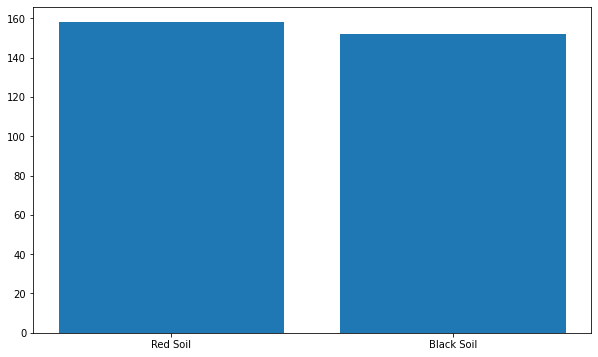

In [11]:
soilType = soilCount.keys()
soilCounts = soilCount.values()
plt.bar(soilType, soilCounts)
df = df.drop(['SoilType'], axis=1)

In [12]:
# Analysis of Crops grown 

In [13]:
df.Crop.unique()

array(['Chickpea', 'Pigeonpea', 'Jowar', 'Coriandam', 'Blackgram',
       'Bengalgram', 'Redgram', 'Cotton', 'Paddy', 'JOWAR', 'Paddy,jowar',
       'Fodder Crops', 'Dhanyalu', 'Jonna, Senaga', 'Senaga', 'Pogaku',
       'Mahendra Jonna', 'Merappa ; Senaga', 'Menumu', 'Pacha Jonna',
       'Jonna', 'Vari', 'Sunflower', 'Cottan', 'Ground Nat,Cottan',
       'Oniyan,Ground Nat', 'cotton', 'ground nut',
       'ground nut/groundnut', 'groundnut', 'Cottan,Ground Nat',
       'Grounat', 'Ground Nat', 'Cottan ,Groundnat', 'Cottan,',
       'Groundnut', 'Groundnut,Cottan', 'Ground nut,Cottan',
       'Cottan,Castral', 'GroundNut', 'Castor', 'GroundNut,Cotton',
       'Ground nut', 'Cotton,Vegitable', 'Ground nut,castor',
       'Ground nut ,Mirchi', 'Cotton,Ground Nut', 'Ground Nut',
       'Cotton,castor', 'Ground Nut, Cotton', 'Ground Nut,jowar',
       'Ground Nut ,Cotton', 'Clastor', 'Cotton,Groundnut'], dtype=object)

In [14]:
df['Crop'].value_counts()

Cotton                  83
Groundnut               44
Cottan                  16
Bengalgram              13
Jowar                   11
Senaga                  10
Paddy                    9
Ground Nut               9
Jonna                    8
Coriandam                8
GroundNut                7
Vari                     7
Sunflower                6
Mahendra Jonna           6
Dhanyalu                 5
Cottan,Ground Nat        5
Ground Nat               5
Redgram                  4
Blackgram                4
ground nut/groundnut     4
cotton                   4
Chickpea                 3
Paddy,jowar              2
Cotton,Ground Nut        2
Pacha Jonna              2
Groundnut,Cottan         2
Ground Nut,jowar         2
Clastor                  2
Ground nut,castor        2
Cottan,Castral           1
Ground nut               1
Castor                   1
Ground nut ,Mirchi       1
Ground Nut ,Cotton       1
Ground Nat,Cottan        1
Jonna, Senaga            1
GroundNut,Cotton         1
C

GroundNut + Cotton    202
Jowar                  30
BengalGram             25
Coriander              13
Name: Crop, dtype: int64


<BarContainer object of 4 artists>

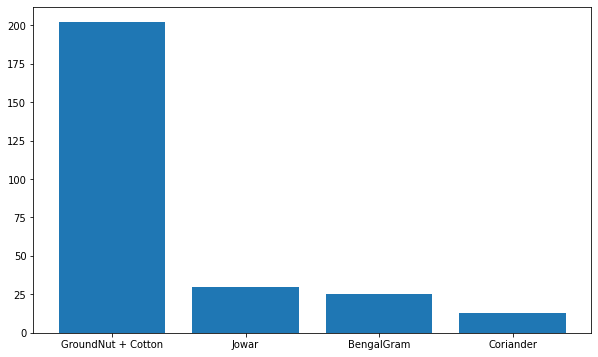

In [15]:
df['Crop'] = df['Crop'].replace('chill', 'Chilli')
df['Crop'] = df['Crop'].replace(['MAZI', 'maize', 'Mazi'], 'Maize')
df['Crop'] = df['Crop'].replace(['Bengalgram', 'Senaga', 'Merappa ; Senaga', 'Erra senaga', 'Jonna, Senaga', 'Jonna/Senaga'], 'BengalGram')
df['Crop'] = df['Crop'].replace(['jowar', 'Jowar', 'JOWAR', 'Jonna', 'Mahendra Jonna', 'Pacha Jonna', 'Erra Jonna', 'Veru senaga, Jonna', 'Jonna+ sunflower', 'Paddy,jowar'],'Jowar')
df['Crop'] = df['Crop'].replace('Vari','BarnyardMillet')
df['Crop'] = df['Crop'].replace(['Dhanyalu', 'Coriandam', 'Dhanyalu , Jonnalu'], 'Coriander')
df['Crop'] = df['Crop'].replace(['Oniyan,Ground Nat', 'ground nut', 'ground nut/groundnut', 'groundnut', 'Grounat', 'Ground Nat', 'Groundnut', 'GroundNut', 'Ground nut', 'Ground nut,castor', 'Ground nut ,Mirchi', 'Ground Nut', 'Ground Nut,jowar'],'GroundNut')
df['Crop'] = df['Crop'].replace(['Cottan', 'cotton', 'Cottan,', 'Cottan,Castral', 'Cotton,Vegitable', 'Cotton,castor'],'Cotton')
df['Crop'] = df['Crop'].replace(['Ground Nat,Cottan', 'Cottan,Ground Nat', 'Cottan ,Groundnat', 'Groundnut,Cottan', 'Ground nut,Cottan', 'GroundNut,Cotton', 'Cotton,Ground Nut', 'Ground Nut, Cotton', 'Ground Nut ,Cotton', 'Cotton,Groundnut', 'Cotton', 'GroundNut'], 'GroundNut + Cotton')
df = df[(df['Crop'] != 'Clastor') & (df['Crop'] != 'Castor') & (df['Crop'] != 'Onian') & (df['Crop'] != 'Korra, Maagu') & (df['Crop'] != 'Menumu') & (df['Crop'] != 'Peasara + Pacha Gaddi')]
df = df[(df['Crop'] != 'Chickpea') & (df['Crop'] != 'Pigeonpea') & (df['Crop'] != 'Blackgram') & (df['Crop'] != 'Redgram') & (df['Crop'] != 'Fodder Crops') & (df['Crop'] != 'Pogaku')]
df = df[(df['Crop'] != 'Sunflower') & (df['Crop'] != 'Paddy') & (df['Crop'] != 'BarnyardMillet')]

print(df['Crop'].value_counts())
cropCount = dict(df['Crop'].value_counts())
cropType = cropCount.keys()
cropCounts = cropCount.values()
plt.bar(cropType, cropCounts)

In [16]:
# Getting rid of features that have a high correlation among one another

In [17]:
cor_matrix = df.corr()
cor_matrix

,pH,EC,OC,P,K,Ca,Mg,S,Zn,B,Fe,Cu,Mn,EVI
pH,1.000000,0.154581,0.147291,-0.398731,0.350931,0.626788,0.643470,0.075312,-0.127017,0.372085,-0.273208,0.108424,-0.416163,0.110785
EC,0.154581,1.000000,0.047219,-0.090406,0.135849,0.171570,0.157315,0.898074,-0.009813,0.760557,-0.010272,0.054859,-0.048448,0.035307
OC,0.147291,0.047219,1.000000,0.342842,0.606173,0.200203,0.247514,0.026382,0.316863,0.156429,0.104527,0.468411,0.272497,0.043008
P,-0.398731,-0.090406,0.342842,1.000000,0.070703,-0.513249,-0.387599,-0.064982,0.469348,-0.228942,-0.053793,-0.013029,0.173210,-0.052053
K,0.350931,0.135849,0.606173,0.070703,1.000000,0.529954,0.529136,0.076988,0.148299,0.332151,0.263453,0.413098,0.199230,0.068226
Ca,0.626788,0.171570,0.200203,-0.513249,0.529954,1.000000,0.910068,0.137835,-0.179656,0.484463,0.309439,0.389341,0.018532,0.252187
Mg,0.643470,0.157315,0.247514,-0.387599,0.529136,0.910068,1.000000,0.129683,-0.059716,0.529157,0.238333,0.465359,0.034844,0.232972
S,0.075312,0.898074,0.026382,-0.064982,0.076988,0.137835,0.129683,1.000000,0.002336,0.762918,0.001949,0.049728,-0.012802,0.056938
Zn,-0.127017,-0.009813,0.316863,0.469348,0.148299,-0.179656,-0.059716,0.002336,1.000000,0.033656,-0.070543,0.268873,0.211985,0.007383
B,0.372085,0.760557,0.156429,-0.228942,0.332151,0.484463,0.529157,0.762918,0.033656,1.000000,0.077278,0.263906,-0.022490,0.155402


In [18]:
upper_tri = cor_matrix.where(np.triu(np.ones(cor_matrix.shape),k=1).astype(np.bool))
to_drop = [column for column in upper_tri.columns if any(upper_tri[column] > 0.5)]
print('Columns to be dropped : ', to_drop)

Columns to be dropped :  ['K', 'Ca', 'Mg', 'S', 'B', 'Mn']


In [19]:
df = df.drop(to_drop, axis = 1)
print('Columns taken into consideration : ', list(df.columns))

Columns taken into consideration :  ['pH', 'EC', 'OC', 'P', 'Zn', 'Fe', 'Cu', 'EVI', 'Crop']


In [20]:
# Separating the dependent and independent variables
X = df.iloc[:, :-1]
y = df.iloc[:, -1]

In [21]:
# Encoding SoilType as it is a categorical variable
X = pd.get_dummies(X, prefix='', prefix_sep='')
print(X.head(1))
print(y.head(1))
X = X.values
y = y.values

        pH    EC    OC     P    Zn     Fe    Cu       EVI
1704  8.56  0.34  0.22  4.27  0.38  10.87  1.12  0.219145
1704    Jowar
Name: Crop, dtype: object


In [22]:
# Standardizing the independent variables using Feature Scaling
sc1 = StandardScaler()
X[:, :] = sc1.fit_transform(X[:, :])

In [23]:
# Splitting the dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0, stratify=y)

# K-Nearest Neighbors Classifier

In [24]:
clf1 = KNeighborsClassifier(weights='distance')
clf1.fit(X_train, y_train)

KNeighborsClassifier(weights='distance')

In [25]:
y_test_pred = clf1.predict(X_test)
y_train_pred = clf1.predict(X_train)
AC1_train = accuracy_score(y_train, y_train_pred)
AC1_test = accuracy_score(y_test, y_test_pred)

In [26]:
print('Training Accuracy: ', AC1_train)
print('Testing Accuracy: ', AC1_test)

Training Accuracy:  1.0
Testing Accuracy:  0.7941176470588235


In [27]:
# k-Fold Cross Validation
accuracyList = cross_val_score(estimator = clf1, X = X_train, y = y_train, cv = 10)
print('Accuracy: {:.2f} %'.format(accuracyList.mean() * 100))
print('Standard Deviation: {:.2f} %'.format(accuracyList.std() * 100))

Accuracy: 73.24 %
Standard Deviation: 3.42 %


# Decision Tree Classifier

In [28]:
clf2 = DecisionTreeClassifier(random_state=0)
clf2.fit(X_train, y_train)

DecisionTreeClassifier(random_state=0)

In [29]:
y_test_pred = clf2.predict(X_test)
y_train_pred = clf2.predict(X_train)
AC2_train = accuracy_score(y_train, y_train_pred)
AC2_test = accuracy_score(y_test, y_test_pred)

In [30]:
print('Training Accuracy: ', AC2_train)
print('Testing Accuracy: ', AC2_test)

Training Accuracy:  1.0
Testing Accuracy:  0.8088235294117647


In [31]:
# k-Fold Cross Validation
accuracyList = cross_val_score(estimator = clf2, X = X_train, y = y_train, cv = 10)
print('Accuracy: {:.2f} %'.format(accuracyList.mean() * 100))
print('Standard Deviation: {:.2f} %'.format(accuracyList.std() * 100))

Accuracy: 74.76 %
Standard Deviation: 5.60 %


# Random Forest Classifier

In [32]:
clf3 = RandomForestClassifier(random_state=0)
clf3.fit(X_train, y_train)

RandomForestClassifier(random_state=0)

In [33]:
y_test_pred = clf3.predict(X_test)
y_train_pred = clf3.predict(X_train)
AC3_train = accuracy_score(y_train, y_train_pred)
AC3_test = accuracy_score(y_test, y_test_pred)

In [34]:
print('Training Accuracy: ', AC3_train)
print('Testing Accuracy: ', AC3_test)

Training Accuracy:  1.0
Testing Accuracy:  0.8382352941176471


In [35]:
# k-Fold Cross Validation
accuracyList = cross_val_score(estimator = clf3, X = X_train, y = y_train, cv = 10)
print('Accuracy: {:.2f} %'.format(accuracyList.mean() * 100))
print('Standard Deviation: {:.2f} %'.format(accuracyList.std() * 100))

Accuracy: 75.74 %
Standard Deviation: 5.68 %


# XGBoost

In [36]:
clf4 = HistGradientBoostingClassifier(random_state=0)
clf4.fit(X_train, y_train)

HistGradientBoostingClassifier(random_state=0)

In [37]:
y_test_pred = clf4.predict(X_test)
y_train_pred = clf4.predict(X_train)
AC4_train = accuracy_score(y_train, y_train_pred)
AC4_test = accuracy_score(y_test, y_test_pred)

In [38]:
print('Training Accuracy: ', AC4_train)
print('Testing Accuracy: ', AC4_test)

Training Accuracy:  1.0
Testing Accuracy:  0.8088235294117647


In [39]:
# k-Fold Cross Validation
accuracyList = cross_val_score(estimator = clf4, X = X_train, y = y_train, cv = 10)

In [40]:
print('Accuracy: {:.2f} %'.format(accuracyList.mean() * 100))
print('Standard Deviation: {:.2f} %'.format(accuracyList.std() * 100))

Accuracy: 74.69 %
Standard Deviation: 4.95 %


In [41]:
pickle.dump(clf4, open('Kurnool_model.pkl', 'wb'))
pickle.dump(sc1, open('Kurnool_scaler.pkl', 'wb'))

# Multi-layer Perceptron Classifier

In [42]:
clf5 = MLPClassifier(random_state=0, learning_rate= 'adaptive')
clf5.fit(X_train, y_train)

MLPClassifier(learning_rate='adaptive', random_state=0)

In [43]:
y_test_pred = clf5.predict(X_test)
y_train_pred = clf5.predict(X_train)
AC5_train = accuracy_score(y_train, y_train_pred)
AC5_test = accuracy_score(y_test, y_test_pred)

In [44]:
print('Training Accuracy: ', AC5_train)
print('Testing Accuracy: ', AC5_test)

Training Accuracy:  0.8415841584158416
Testing Accuracy:  0.7941176470588235


In [45]:
# k-Fold Cross Validation
accuracyList = cross_val_score(estimator = clf5, X = X_train, y = y_train, cv = 10)
print('Accuracy: {:.2f} %'.format(accuracyList.mean() * 100))
print('Standard Deviation: {:.2f} %'.format(accuracyList.std() * 100))

Accuracy: 77.67 %
Standard Deviation: 4.79 %


# Catboost

In [46]:
from catboost import CatBoostClassifier, Pool, cv

model = CatBoostClassifier(iterations=100, depth=2, learning_rate=1, loss_function='MultiClass', verbose=True)
model.fit(X_train, y_train)

model.calc_feature_statistics(X_train, y_train, feature=1, plot=True)

train_data = Pool(data=X_train, label=y_train)
model.get_feature_importance(train_data)

#Cross-Validation
cv_dataset = Pool(data=X_train, label=y_train)
params = {"iterations": 100, "depth": 2, "loss_function": "MultiClass", "verbose": False}
scores = cv(cv_dataset, params, fold_count=5, plot="True")

model = CatBoostClassifier(loss_function='MultiClass')
grid = {'learning_rate': [0.03, 0.1], 'depth': [4, 6, 10]}
grid_search_result = model.grid_search(grid, X=X_train, y=y_train, cv=3, plot=True)

model.score(X_test, y_test)

# k-Fold Cross Validation
accuracyList = cross_val_score(estimator = model, X = X_train, y = y_train, cv = 10)
print('Accuracy: {:.2f} %'.format(accuracyList.mean() * 100))
print('Standard Deviation: {:.2f} %'.format(accuracyList.std() * 100))

0:	learn: 0.8032832	total: 46.9ms	remaining: 4.64s
1:	learn: 0.6159905	total: 48ms	remaining: 2.35s
2:	learn: 0.5785842	total: 48.8ms	remaining: 1.58s
3:	learn: 0.5103710	total: 49.5ms	remaining: 1.19s
4:	learn: 0.4697676	total: 50.1ms	remaining: 953ms
5:	learn: 0.4606049	total: 51ms	remaining: 800ms
6:	learn: 0.4591998	total: 51.7ms	remaining: 687ms
7:	learn: 0.4232135	total: 52.4ms	remaining: 603ms
8:	learn: 0.4180282	total: 53.1ms	remaining: 537ms
9:	learn: 0.3949562	total: 53.7ms	remaining: 483ms
10:	learn: 0.3819876	total: 54.4ms	remaining: 440ms
11:	learn: 0.3706831	total: 55.1ms	remaining: 404ms
12:	learn: 0.3579066	total: 55.7ms	remaining: 373ms
13:	learn: 0.3545634	total: 56.4ms	remaining: 346ms
14:	learn: 0.3478353	total: 57.1ms	remaining: 324ms
15:	learn: 0.3386691	total: 57.8ms	remaining: 303ms
16:	learn: 0.3144502	total: 58.5ms	remaining: 285ms
17:	learn: 0.3131036	total: 59.1ms	remaining: 269ms
18:	learn: 0.3028152	total: 59.7ms	remaining: 255ms
19:	learn: 0.2997211	total

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

Training on fold [0/5]

bestTest = 0.5390378247
bestIteration = 99

Training on fold [1/5]

bestTest = 0.6011443494
bestIteration = 99

Training on fold [2/5]

bestTest = 0.5464033576
bestIteration = 99

Training on fold [3/5]

bestTest = 0.5816677827
bestIteration = 99

Training on fold [4/5]

bestTest = 0.5881361288
bestIteration = 97



MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

Streaming output truncated to the last 5000 lines.
2:	learn: 1.0977277	total: 2.86ms	remaining: 951ms
3:	learn: 1.0357893	total: 3.81ms	remaining: 948ms
4:	learn: 0.9628766	total: 4.75ms	remaining: 946ms
5:	learn: 0.9051327	total: 5.92ms	remaining: 980ms
6:	learn: 0.8610826	total: 7.09ms	remaining: 1.01s
7:	learn: 0.8188109	total: 8.2ms	remaining: 1.02s
8:	learn: 0.7821388	total: 9.29ms	remaining: 1.02s
9:	learn: 0.7496336	total: 10.4ms	remaining: 1.02s
10:	learn: 0.7277094	total: 11.5ms	remaining: 1.03s
11:	learn: 0.6989063	total: 12.6ms	remaining: 1.04s
12:	learn: 0.6768871	total: 14ms	remaining: 1.06s
13:	learn: 0.6553583	total: 15.2ms	remaining: 1.07s
14:	learn: 0.6380158	total: 16.4ms	remaining: 1.08s
15:	learn: 0.6206579	total: 17.6ms	remaining: 1.08s
16:	learn: 0.6032479	total: 18.8ms	remaining: 1.09s
17:	learn: 0.5885126	total: 20ms	remaining: 1.09s
18:	learn: 0.5752912	total: 21ms	remaining: 1.08s
19:	learn: 0.5614277	total: 22.2ms	remaining: 1.09s
20:	learn: 0.5500864	total: 